# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## Imbalanced label

Text(0, 0.5, 'Frequency')

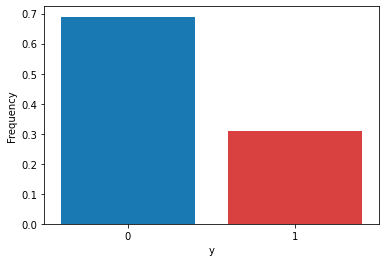

In [2]:
see = train.groupby("y").count()/len(train)
see["y"] = [0,1]
sns.barplot(x = "y", y = "XC", data = see, palette=[(0, 0.50, 0.80),(0.95, 0.15, 0.15)])
plt.ylabel("Frequency")

## Distribution of numeric features

Numeric summary.

In [3]:
train.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,y
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.010983,0.000230,-0.000286,-0.015177,0.021054,0.024919,0.006453,-0.012481,0.013967,0.009699,...,0.013398,-0.019130,-0.029382,0.014356,0.000720,0.010224,-0.011796,0.003499,-0.005419,0.310333
std,1.012700,1.017138,1.019117,1.009673,0.969576,0.980077,0.990692,0.995834,0.998037,0.998985,...,1.012888,1.014302,0.992536,1.013017,0.990562,1.003015,0.971508,1.011437,1.006871,0.462707
min,-3.093166,-3.738974,-3.525581,-3.521142,-3.202552,-3.199599,-3.448851,-3.398279,-3.457746,-4.399425,...,-3.622536,-4.282479,-3.749571,-3.837230,-3.311344,-3.793387,-3.459479,-3.210445,-3.766764,0.000000
25%,-0.682948,-0.695451,-0.684163,-0.687436,-0.652434,-0.615469,-0.667230,-0.682846,-0.663541,-0.672429,...,-0.682156,-0.705836,-0.704141,-0.671375,-0.687938,-0.698100,-0.663928,-0.686131,-0.654146,0.000000
50%,0.000269,-0.014849,0.010666,0.016617,0.029511,0.020646,0.003250,0.011030,0.019364,0.023895,...,0.030227,-0.011440,-0.057855,0.029239,-0.000688,0.006527,-0.038423,0.002883,-0.010625,0.000000
75%,0.709466,0.699497,0.687838,0.655476,0.647919,0.670551,0.691327,0.644410,0.704795,0.681197,...,0.681405,0.661482,0.623452,0.705453,0.669579,0.703808,0.653152,0.700227,0.670643,1.000000
max,3.502132,3.211162,3.700728,3.259345,3.750843,3.581993,3.666706,3.483763,3.387854,2.947429,...,3.517712,3.101140,3.421847,3.641376,4.031974,3.487480,3.553014,3.339552,4.141004,1.000000


Conduct Shapiro-Wilk test to test normality.

In [4]:
# Shapiro-Wilk test
pvalues = []
for i in range(30):
    pvalues.append(stats.shapiro(train.iloc[:,i])[1])
print(pvalues)
print(min(pvalues)) # smallest pvalue
pvalues.index(min(pvalues)) # feature with the smallest pvalue

[0.1879172921180725, 0.7080678343772888, 0.9019246697425842, 0.1968691349029541, 0.15739235281944275, 0.39076417684555054, 0.401626318693161, 0.9220578670501709, 0.8231563568115234, 0.06739671528339386, 0.8033127188682556, 0.5001811385154724, 0.09098642319440842, 0.9572435021400452, 0.7752044200897217, 0.08589202910661697, 0.4383937120437622, 0.5788324475288391, 0.5015379786491394, 0.045868370682001114, 0.7966436743736267, 0.7078874111175537, 0.19874168932437897, 0.08473578095436096, 0.8517739772796631, 0.6991891860961914, 0.08239363878965378, 0.5028142929077148, 0.8767242431640625, 0.6543123126029968]
0.045868370682001114


19

Density plot of X19 which is the feature with the smallest pvalue of Shapiro-Wilk test.

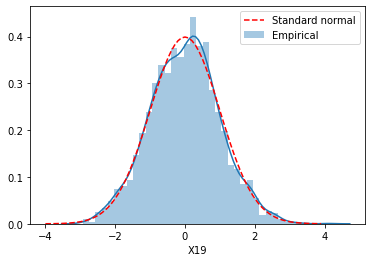

In [5]:
# density plot of X19 which is the feature with the smallest pvalue of Shapiro-Wilk test
sns.distplot(train["X19"], label = "Empirical")
h = np.arange(-4, 4, 0.1)
fit = stats.norm.pdf(h, 0, 1) 
plt.plot(h, fit, 'r--', label = "Standard normal")
plt.legend()
plt.show()

## Correlation of numeric features

[Text(0.5, 0, 'X0'),
 Text(2.5, 0, 'X2'),
 Text(4.5, 0, 'X4'),
 Text(6.5, 0, 'X6'),
 Text(8.5, 0, 'X8'),
 Text(10.5, 0, 'X10'),
 Text(12.5, 0, 'X12'),
 Text(14.5, 0, 'X14'),
 Text(16.5, 0, 'X16'),
 Text(18.5, 0, 'X18'),
 Text(20.5, 0, 'X20'),
 Text(22.5, 0, 'X22'),
 Text(24.5, 0, 'X24'),
 Text(26.5, 0, 'X26'),
 Text(28.5, 0, 'X28')]

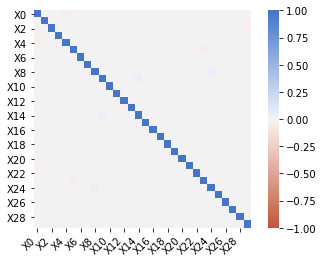

In [6]:
data = train.drop(columns = ["XC",'y'])
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 255, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

No correlations between all numeric variables.

## Preliminary variable selection

Investigate the relationship between numeric features and response by boxplot. 

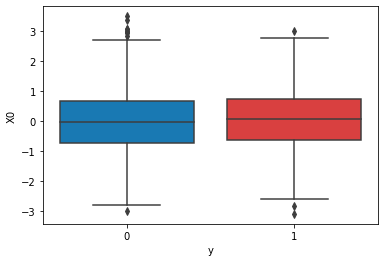

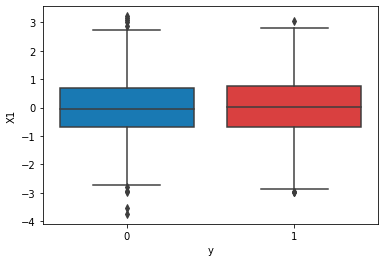

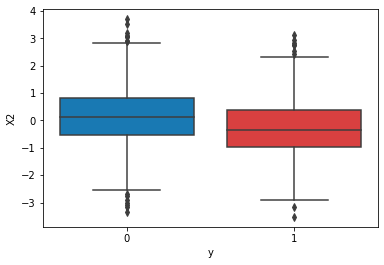

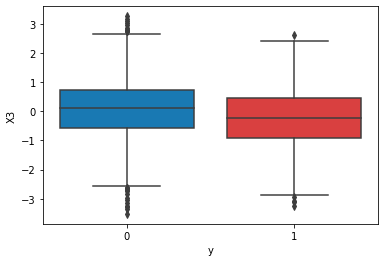

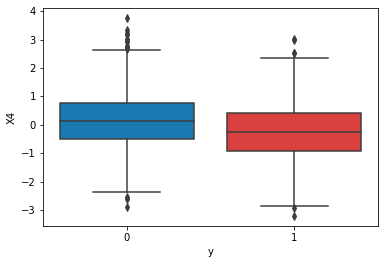

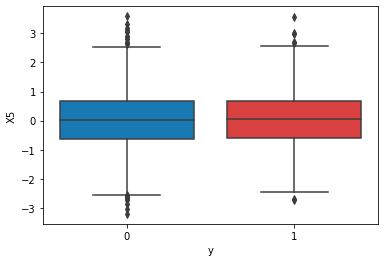

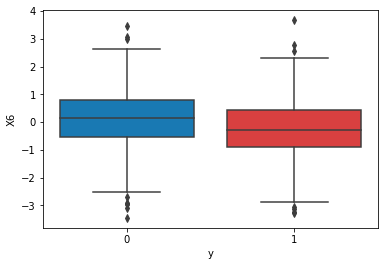

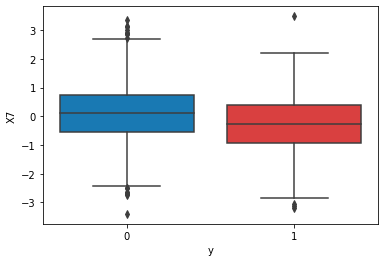

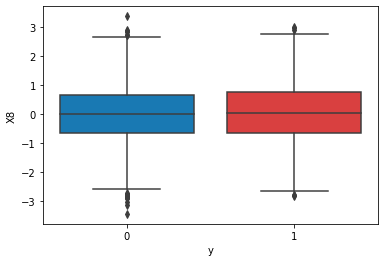

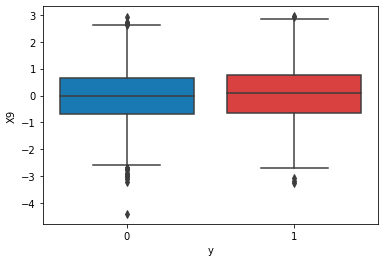

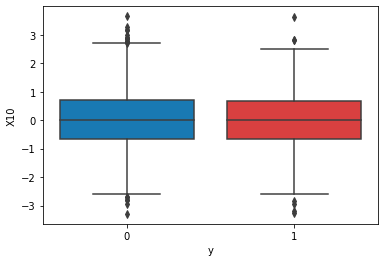

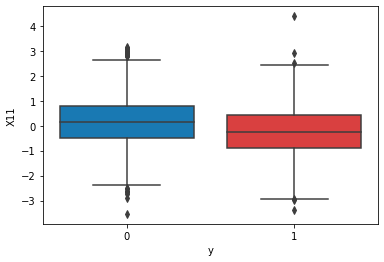

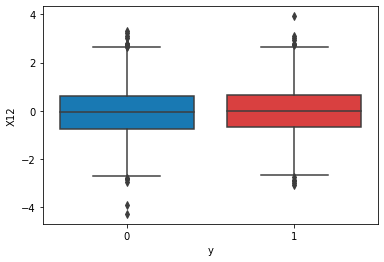

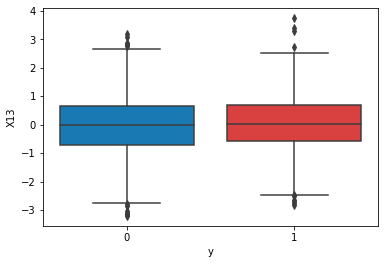

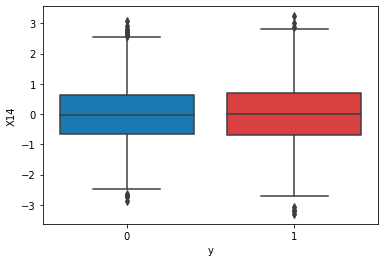

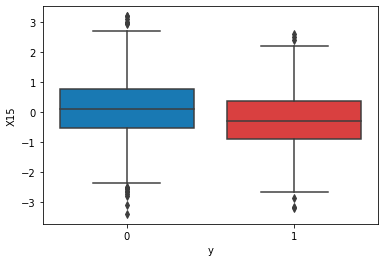

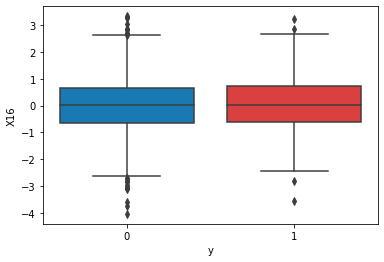

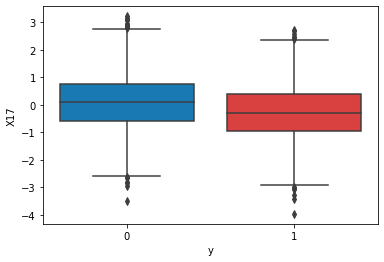

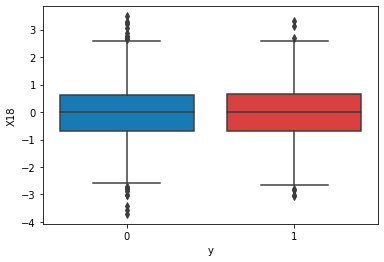

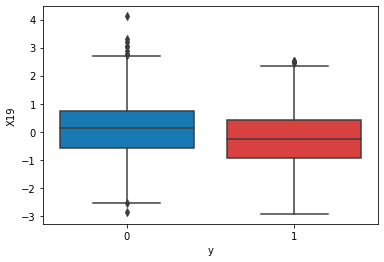

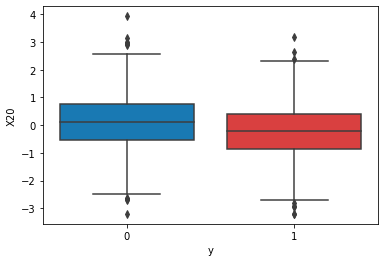

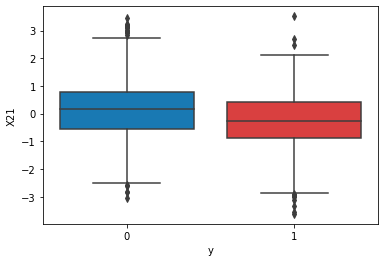

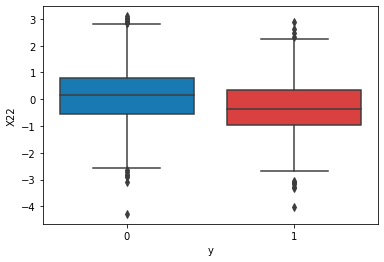

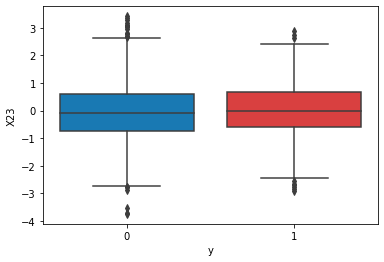

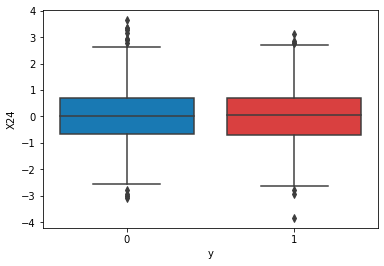

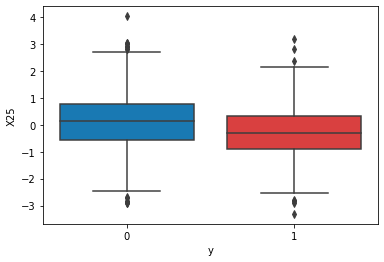

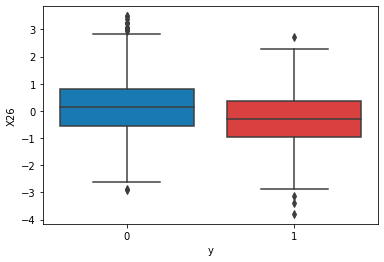

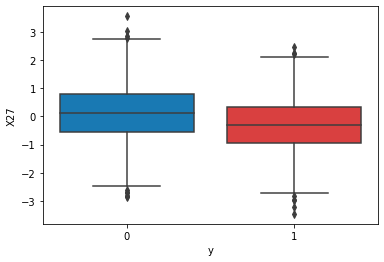

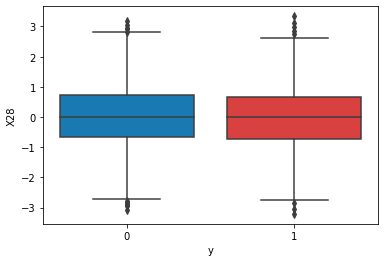

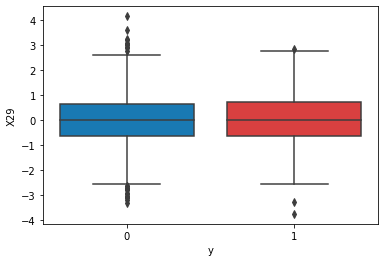

In [7]:
for i in range(30):
    sns.boxplot(x = "y", y = "X"+str(i), data=train, palette=[(0, 0.50, 0.80),(0.95, 0.15, 0.15)])
    plt.show()

By examine the boxplots, we found the following variables might be of importance
$X_2,X_3,X_4,X_6,X_7,X_{11},X_{15},X_{17},X_{19},X_{20},X_{21},X_{22},X_{25},X_{26},X_{27}.$

## Categorical feature

Plot the distribution of class labels given each state of the categorical feature.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

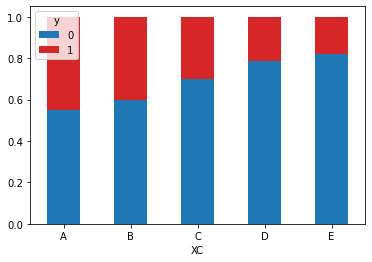

In [8]:
table = pd.crosstab(train.XC,train.y)
table["state"] = ["A","B","C","D","E"]
tab2 = train[["XC","y"]].groupby("XC")
tab3 = tab2.count()
tab3[0] = tab2.count()
tab3[1] = tab2.count()
table[0] = table[0] / tab3[0]
table[1] = table[1] / tab3[1]
table.plot.bar(stacked=True, color = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
                                      (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)])
plt.xticks(rotation=0)
# We are plotting the distribution of class labels given each state of the categorical feature.

##  Identical distribution of the training and testing data

Conduct Kolmogorov-Smirnov test between training and test set to test they have identical distribution.

In [9]:
##  Kolmogorov-Smirnov test between train and test
pvalues_KS = []
for i in range(30):
    pvalues_KS.append(stats.ks_2samp(train.iloc[:,i], test.iloc[:,i])[1])
print(pvalues_KS)
print(min(pvalues_KS))

[0.547867405381942, 0.6386986118383577, 0.23589825703133482, 0.9542704801483568, 0.5092441037225208, 0.0721759068528609, 0.06592389357771755, 0.0950459087451232, 0.8596324731660099, 0.31894024410468236, 0.6828350157581446, 0.2316916896113257, 0.05944839920827838, 0.8954186252503666, 0.8625508838027152, 0.16532723979975017, 0.7120521076037138, 0.9604670838469491, 0.15899239072511973, 0.34878537843307156, 0.4075731639330147, 0.429474271633711, 0.49548922062210765, 0.07299171697567741, 0.18031275060825247, 0.5443122879583228, 0.733715046776724, 0.09607424549144217, 0.4263052096389286, 0.10463948897547926]
0.05944839920827838


All numeric features have identical distribution in training and test set.